# - Exercici 1
## Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/alpid/Downloads/wineData.txt", sep = ",", header = None)
df.columns = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavonoids", "Nonflavonoids_phenols", "Proanthocyanins", "Color_intensity", "Hue", "0D280/0D315_of diluted_wines", "Proline"]
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoids_phenols,Proanthocyanins,Color_intensity,Hue,0D280/0D315_of diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Preproceso

Primero voy a indetificar la muestra y el objetivo:

In [3]:
y = df["Class"]  # Atención, hay que asignar y primero si utilizo el drop en vez de el iloc porque no se puede asignar una columna ya dropped.
X = df.drop(["Class"], axis = 1)

In [4]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [5]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoids_phenols,Proanthocyanins,Color_intensity,Hue,0D280/0D315_of diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Ahora puedo dividir la muestra y el objetivo para crear el entorno de entrenamiento y el de test para mis modelos de regresion:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Finalmente voy a normalizar la muestra pues tengo valores de cientos (p.e. la cantidad de Magnesio) y valores de decimales (p.e. la cantidad de Nonflavonoids_phenols):

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Ahora ya puedo trabajar con los distintos modelos de clasificacion:

### 1.1. Decision tree 

In [8]:
from sklearn.tree import DecisionTreeClassifier # Importar Decision Tree Classifier
from sklearn import metrics #Importar scikit-learn metrics module para el cálculo de acccuracy

In [9]:
# Creo el Decision tree clasifier objeto
clf = DecisionTreeClassifier()
# TLo entreno
clf = clf.fit(X_train_scaled,y_train)
#Lanzo la predición para el data test
y_pred = clf.predict(X_test_scaled)

In [24]:
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"Profundidad del árbol: {clf.get_depth()}")

Accuracy: 0.8983050847457628
Profundidad del árbol: 6


tengo un ratio de accuracy del 89.8%

Visualicemos el modelo:

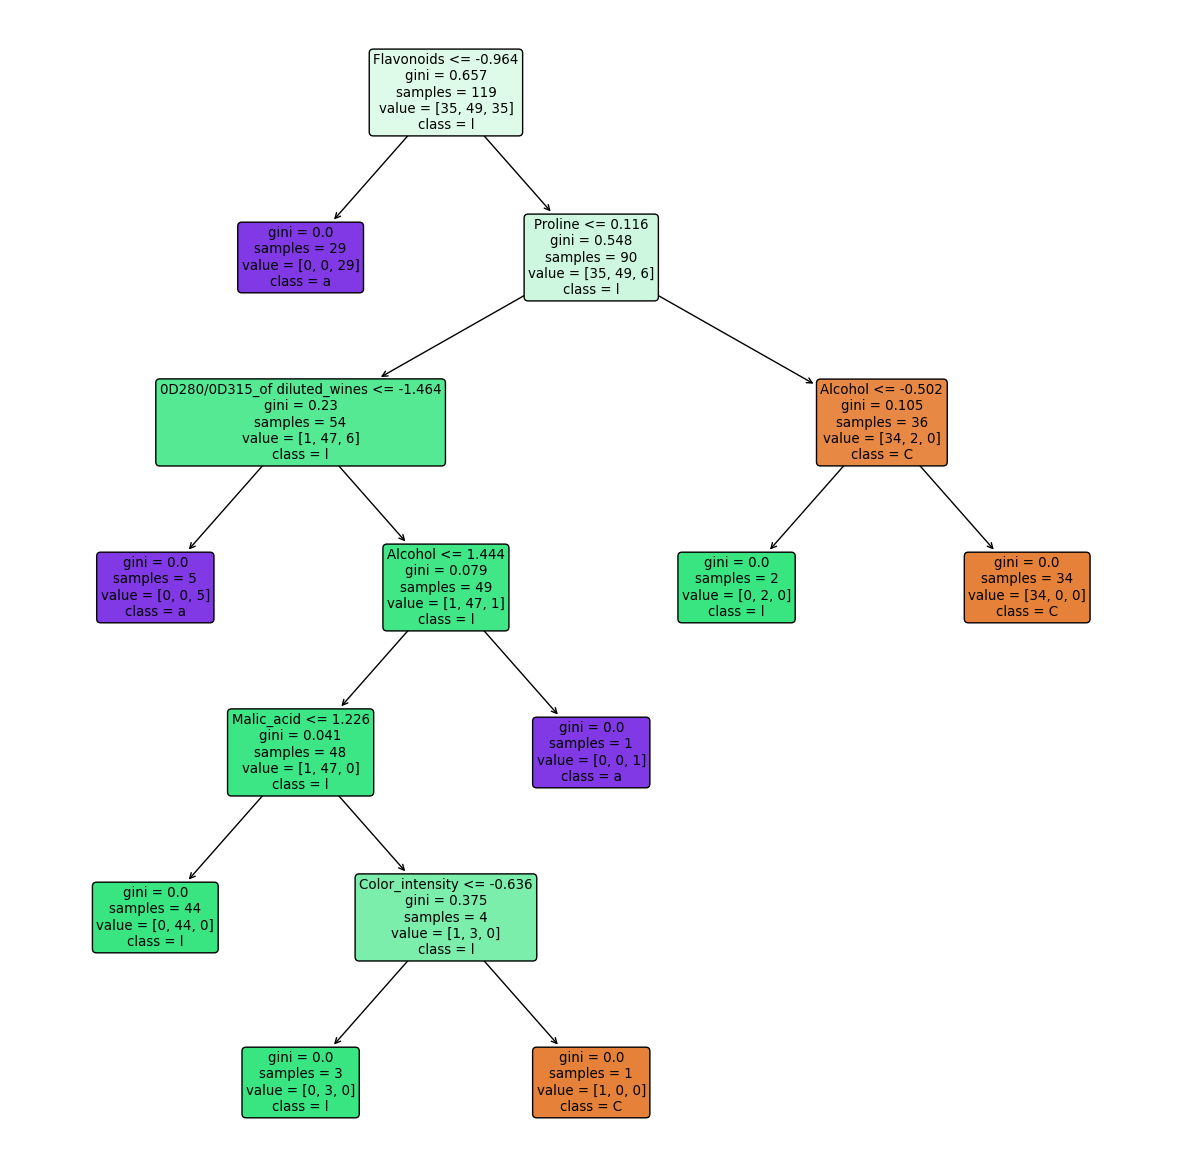

In [23]:
from sklearn.tree import plot_tree
feature_cols = df.columns.drop(["Class"])
plt.figure(figsize=(15, 15))
plot_tree(clf, feature_names=feature_cols, class_names="Class", filled=True, rounded=True)
plt.show()

Voy a somerter el modelo a un proceso de pruning con el objetivo de iidentificar la profundidad optima, que consigue reducir la varianza y aumentar la capacidad predictiva del modelo:

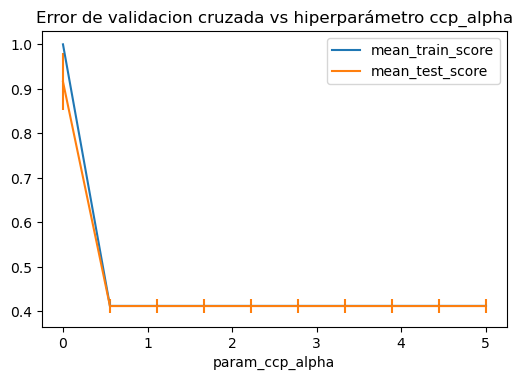

In [35]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 1
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

de donde como se pude ver:

In [36]:
grid.best_params_

{'ccp_alpha': 0.0}

Indetificado el valor mejor de ccp_alpha se debería reentrenar el Tree Clasifier con este valor, pero como he puesto en el GridSearchCV() refit=True, el modelo se ha reentrenado automáticamente y el modelo tiene los parámetros alamcenados en .best_estimator_, así que creo el nuevo modelo con estos parámetros:

In [37]:
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 6
Número de nodos terminales: 8


In [38]:
y_final = modelo_final.predict(X_test_scaled)

In [39]:
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_final))

Accuracy: 0.8813559322033898


La verdad que me da un poco peor que el calculo directo, supongo porque realmente el arbol es pequeño. :-( pero me sirve para practicar el quitar hojas.

### 1.2. KNN (K-nearest neighbours)

Como ya hemos repprocesado usaré el algoritmo tal cual (sabiendo que por defecto usa 5 neighbours)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [60]:
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9491525423728814


tiene mas accuracy que el Decision tree en este caso.

Voy a encontrar el mejor K para la clasificación usando el f1-score:

In [54]:
from sklearn.metrics import f1_score

f1s = []

# Calcula el f1 score para K valores entre 1 y 40
for i in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # usando average='weighted' para calcualr la media podnerada de las 3 clases 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Grafico el resultado:

Text(0, 0.5, 'F1 Score')

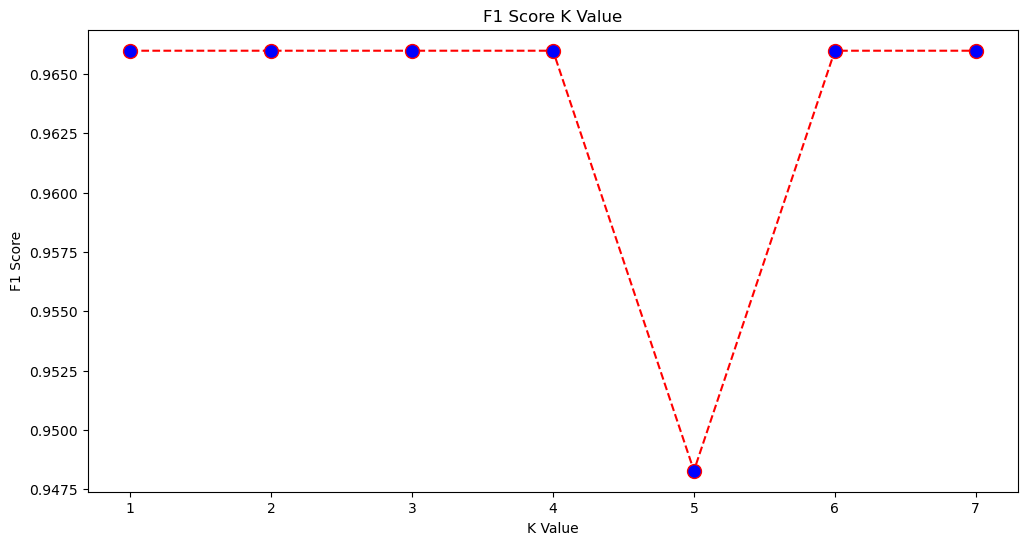

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 8), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Podemos ver que precismente el 5 da el valor mas bajo de K, asi que lo recalculo con valor de 6:

In [64]:
classifier6 = KNeighborsClassifier(n_neighbors=6)
classifier6.fit(X_train_scaled, y_train)
y_pred6 = classifier6.predict(X_test_scaled)
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.9661016949152542


Hemos mejorado la accuracy.

### 1.3 Support vector machines (SVM)

In [75]:
#Imporntamos SVM model
from sklearn import svm

#Creamos un clasificador de SVM
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Lo entrenamos
clf_svm.fit(X_train_scaled, y_train)

#Hacemos la predicción para el test
y_pred_svm = clf.predict(X_test_scaled)

In [76]:
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.8983050847457628


Voy a apliar GridserachCV() para mejorar los hiperparámetros:

In [77]:

from sklearn.model_selection import GridSearchCV

# Defino el grid de parámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

# Creo el clasificador
clf_svm = svm.SVC()

# Creo el objeto GridSearchCV 
grid_svm = GridSearchCV(clf_svm, param_grid, scoring='accuracy')

# Entreno el objeto grid_svm
grid_svm.fit(X_train_scaled, y_train)

# obtengo los nuevos paramentros
best_params = grid_svm.best_params_
best_score = grid_svm.best_score_

# Creo un nuevo modelo clasificador SVM con los mejores parametros
best_clf_svm = svm.SVC(**best_params)

# lo entreno
best_clf_svm.fit(X_train_scaled, y_train)

# hago la predicicion
y_pred_svm = best_clf_svm.predict(X_test_scaled)

In [78]:
#Evaluo la accuracy del modelo, que porcentaje de veces es el modelo correcto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9830508474576272


In [79]:
print("Mejores parámetros:", best_params)

Mejores parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


He conseguido una accuracy del 98,3% con los parametros anteriores.